# Universidad del valle de Guatemala
## Lab 2 – Base 64 y XOR
### Cifrado de Informacion - Ludwing Cano
Abner Ivan Garcia Alegria - 21285

#### Ejercicio 1
Implementar una función que haga la operación XOR, bit a bit, con dos cadenas de
texto.

In [ ]:
def encriptar_con_xor(mensaje, keystream):
    print("\nProceso de encriptación XOR:")
    print("-" * 50)
    print(f"Mensaje original: {mensaje}")
    print(f"Keystream original: {keystream}")

    # Ajustar keystream
    while len(keystream) < len(mensaje):
        keystream += keystream
    print(f"Keystream ajustado: {keystream}")

    print("\nOperación XOR byte por byte:")
    mensaje_encriptado = []
    for i in range(len(mensaje)):
        byte_mensaje = mensaje[i]
        byte_key = keystream[i]
        byte_resultado = byte_mensaje ^ byte_key
        
        print(f"\nPosición {i}:")
        print(f"Byte mensaje: {byte_mensaje:08b} ({chr(byte_mensaje)})")
        print(f"Byte key:    {byte_key:08b} ({chr(byte_key)})")
        print(f"Resultado:   {byte_resultado:08b} ({hex(byte_resultado)})")
        
        mensaje_encriptado.append(byte_resultado)

    resultado_final = bytes(mensaje_encriptado)
    print("\n" + "-" * 50)
    print(f"Resultado final (bytes): {resultado_final}")
    print(f"Resultado final (hex): {resultado_final.hex()}")
    
    return resultado_final

In [3]:
# Ejemplo de uso
texto = b'hola'
clave = b'si'

resultado = encriptar_con_xor(texto, clave)


Proceso de encriptación XOR:
--------------------------------------------------
Mensaje original: b'hola'
Keystream original: b'si'
Keystream ajustado: b'sisi'

Operación XOR byte por byte:

Posición 0:
Byte mensaje: 01101000 (h)
Byte key:    01110011 (s)
Resultado:   00011011 (0x1b)

Posición 1:
Byte mensaje: 01101111 (o)
Byte key:    01101001 (i)
Resultado:   00000110 (0x6)

Posición 2:
Byte mensaje: 01101100 (l)
Byte key:    01110011 (s)
Resultado:   00011111 (0x1f)

Posición 3:
Byte mensaje: 01100001 (a)
Byte key:    01101001 (i)
Resultado:   00001000 (0x8)

--------------------------------------------------
Resultado final (bytes): b'\x1b\x06\x1f\x08'
Resultado final (hex): 1b061f08


#### Ejercicio 2
Dada la imagen XOR_Imagen, y la llave “cifrados_2025” encontrar el valor original de la
imagen.

a. Deben de convertir la imagen a base 64 y aplicarle un xor con la llave para
encontrar su valor

In [ ]:
imagen = "./imagen_xor.png" # Imagen a cifrar

clave = b'cifrados_2025' # Clave para cifrar la imagen

with open(imagen, "rb") as f:  # Leer imagen
    imagen_bytes = f.read() # Convertir imagen a bytes

imagen_resultado = encriptar_con_xor(imagen_bytes, clave) # Cifrar imagen

with open("./imagen_xor_cifrada.png", "wb") as f:  # Guardar imagen cifrada
    f.write(imagen_resultado)  # Guardar imagen cifrada
    print("\nImagen cifrada guardada en /imagen_xor_cifrada.png") # Mensaje de confirmación

Imagen cifrada guardada en /imagen_xor_cifrada.png

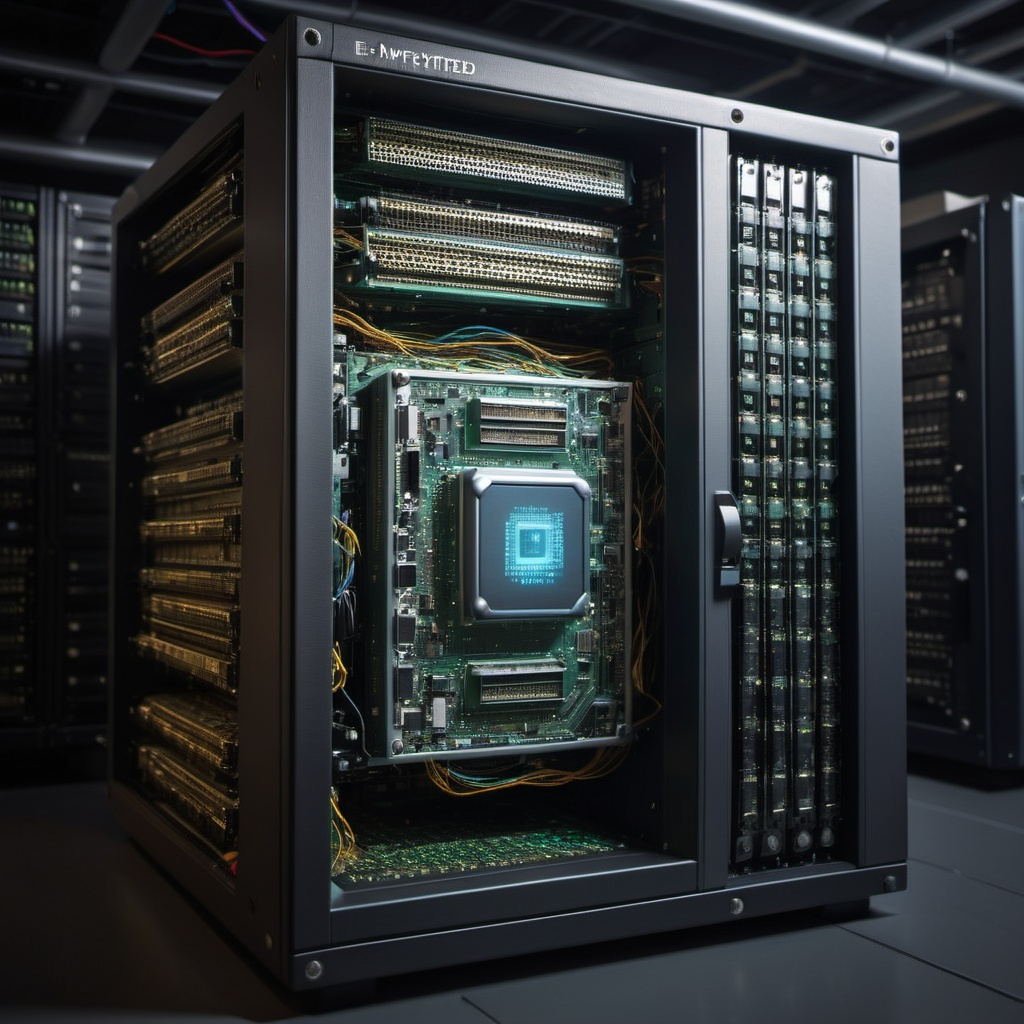

## Ejercicio 3
Investigar porque al aplicar XOR con una llave de texto la imagén se corrompe.

R// Al aplicar XOR a una imagen con una llave de texto, lo que hace es modificar el valor de cada píxel de la imagen basándote en el valor de la llave. Es como si cada color de la imagen original se mezclara con un color "aleatorio" de la llave, resultando en colores completamente nuevos y sin relación aparente con la imagen original. Por ejemplo, imaginemos que estamos pintando un retrato con una paleta de colores que cambia constantemente y sin control; el resultado final sería una imagen irreconocible y "corrompida".

Este texto fue sacado en base a la referencia de
Khan Academy. (s. f.). https://es.khanacademy.org/computing/computer-science/cryptography/ciphers/a/xor-bitwise-operation